# Titanic Data

### Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew (32% survival rate). This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others. What sorts of people were more likely to survive?

### Data Dictionary

Survived: 0 = No, 1 = Yes

Pclass (Passenger Class): class 1 = 1st, 2 = 2nd, 3 = 3rd 

Sex: gender

Age: Age in years 

SibSp: # of siblings / spouses traveling with an individual aboard the Titanic

Parch: # of parents / children traveling with an individual aboard the Titanic 

Ticket: ticket number

Fare: Passenger fare 

Cabin: Cabin number 

Embarked (Port of Embarkation): C = Cherbourg, Q = Queenstown, S = Southampton


   **Variable Notes**
   
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

SibSp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children traveled only with a nanny, therefore Parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Inspect the features
Note which are numerical and which are categorical.

Check for missing values. Which features can be dropped?
Which features may we want to complete/impute?

### Distribution of numerical features

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Distribution of categorical features

In [4]:
df.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kelly, Mrs. Florence ""Fannie""",male,1601,B96 B98,S
freq,1,577,7,4,644


# Exploratory Data Analysis

## Univariate (single variable)

### Bar Chart

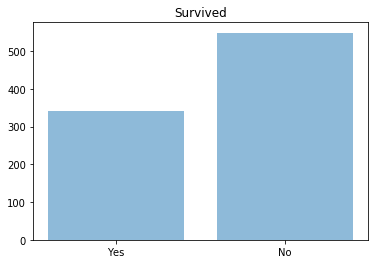

In [5]:
survived = df.loc[df["Survived"]==1, "Survived"].count()
not_survived = df.loc[df["Survived"]==0, "Survived"].count()

plt.bar([0,1], [survived, not_survived], align='center', alpha=0.5)
plt.xticks([0,1], ['Yes', 'No'])

plt.title('Survived')

plt.show()

### Histogram

C:\Users\Shivani Reddy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Shivani Reddy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


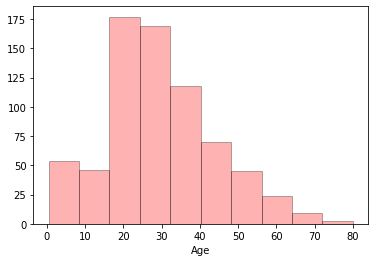

In [6]:
fig, ax = plt.subplots()
ax.hist(df['Age'],  color='red', alpha=.3, edgecolor='black', bins=10)
ax.set(xlabel="Age")

plt.show()

## Bivariate (joint distributions)

### Histogram

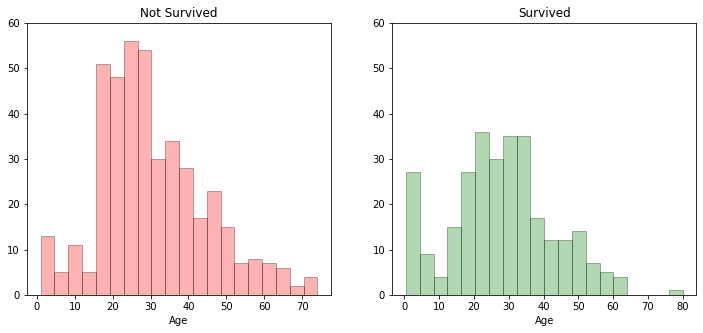

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].hist(df.loc[(df.Age.notnull()) & (df["Survived"] == 0),'Age'],  color='red', alpha=.3, edgecolor='black', bins=20)
ax[0].set(xlabel="Age", title="Not Survived", ylim=(0,60))
ax[1].hist(df.loc[(df.Age.notnull()) & (df["Survived"] == 1),'Age'],  color='green', alpha=.3, edgecolor='black', bins=20)
ax[1].set(xlabel="Age", title="Survived", ylim=(0,60))
plt.show()

### Density Plot

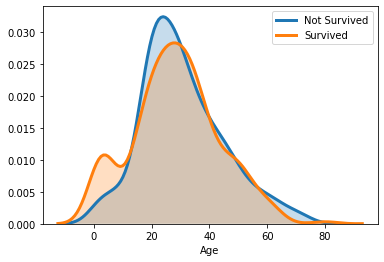

In [8]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df.loc[(df.Age.notnull()) & (df["Survived"] == 0),'Age'], hist = False,
                 kde_kws = {'shade': True, 'linewidth': 3},
                  label = "Not Survived")
sns.distplot(df.loc[(df.Age.notnull()) & (df["Survived"] == 1),'Age'], hist = False,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Survived")

# Analyze by grouping (pivoting) features

### Explore relationships between categorical features

In [9]:
df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [10]:
df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
df[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [12]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)


,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


## Multivariate

### Visualize relationships between multiple categorical features

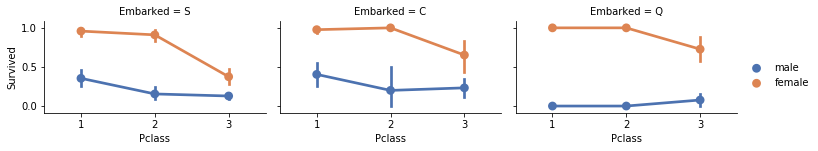

In [13]:
import warnings
warnings.filterwarnings('ignore')

grid = sns.FacetGrid(df, col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = [1,2,3], hue_order=["male", "female"], palette='deep')
grid.add_legend()

#### Data Analysis: 
#### It appears that women, children, the upperclass, and those traveling with at least one other person, but no more than 2, had the best chances to survive the Titanic tragedy.

# Data cleaning and tranformation

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Drop poor features (columns)

In [15]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

### You can also drop all rows with null/missing values

In [16]:
# df = df.dropna()

## Impute missing values ("Embarked")

In [17]:
df["Embarked"].isna().sum()

2

In [18]:
# Display the rows wher Embarked is null

df.loc[df["Embarked"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


### Find the mode for the feature Embarked

In [19]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
# idxmax() will return the index/label associated with the maximum value

embarked_mode = df.Embarked.value_counts().idxmax()
embarked_mode

'S'

### Impute (fill) the missing values for the feature Embarked with the mode 

In [21]:
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

In [22]:
# isnull() == isna()

df["Embarked"].isnull().sum()

0

## One-hot encoding ("Embarked")

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
# Use pandas to one-hot encode "Embarked"

# DEFAULTS:
    # prefix_sep='_' 
    # columns=None   ... will encode all columns with categorical variables
# returns a DataFrame

df = pd.get_dummies(df, columns=["Embarked"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,1


## Binary encoding ("Sex")

In [25]:
# Converting a categorical feature to a binary one

df["Sex"] = df["Sex"].map({'male':0, 'female':1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


## Impute missing values ("Age")

### Check the center of the distribution for the feature "Age"

In [26]:
# Round the age to be a whole number

round(df["Age"].mean())

30

In [27]:
# Slightly right-skewed

df["Age"].median()

28.0

### Use the mean Age, across sets of Pclass and Gender combinations, to impute missing ages.

In [28]:
# Males (coded as Sex=0);  First Class (coded as Pclass=1)

Males_Age01_mean = round(df.loc[(df['Sex']==0) & (df['Pclass']==1), 'Age'].mean())
Males_Age01_mean

41

In [29]:
# Males in Second Class

Males_Age02_mean = round(df.loc[(df['Sex']==0) & (df['Pclass']==2), 'Age'].mean())
Males_Age02_mean

31

In [30]:
# Males in Third Class

Males_Age03_mean = round(df.loc[(df['Sex']==0) & (df['Pclass']==3), 'Age'].mean())
Males_Age03_mean

27

### Replace missing ages with their respective group's mean

In [31]:
df.loc[ (df.Sex==0) & (df.Pclass==1) & (df["Age"].isnull()),'Age'] = Males_Age01_mean
df.loc[ (df.Sex==0) & (df.Pclass==2) & (df["Age"].isnull()),'Age'] = Males_Age02_mean
df.loc[ (df.Sex==0) & (df.Pclass==3) & (df["Age"].isnull()),'Age'] = Males_Age03_mean

### Or

In [32]:
# df.loc[ (df.Sex==0) & (df.Pclass==1),'Age'].fillna(Males_Age01_mean, inplace=True)
# df.loc[ (df.Sex==0) & (df.Pclass==2),'Age'].fillna(Males_Age02_mean, inplace=True)
# df.loc[ (df.Sex==0) & (df.Pclass==3),'Age'].fillna(Males_Age03_mean, inplace=True)

### Or

In [33]:
# df.loc[ (df.Sex==0) & (df.Pclass==1),'Age'] = df.loc[ (df.Sex==0) & (df.Pclass==1),'Age'].fillna(Males_Age01_mean)
# df.loc[ (df.Sex==0) & (df.Pclass==2),'Age'] = df.loc[ (df.Sex==0) & (df.Pclass==2),'Age'].fillna(Males_Age02_mean)
# df.loc[ (df.Sex==0) & (df.Pclass==3),'Age'] = df.loc[ (df.Sex==0) & (df.Pclass==3),'Age'].fillna(Males_Age03_mean)

### Mean "Age" after imputation

In [34]:
round(df["Age"].mean())

30

### Check remaining null values for "Age"

In [35]:
df["Age"].isnull().sum()

53

## (Optional) Exercise

#### *** Do the same, as above, for the female passengers ***

# Hidden missing values

### Diabetes dataset

In [36]:
df = pd.read_csv("diabetes.csv")

In [37]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,age,diabetes
0,6,148,72,35,0,33.6,50,True
1,1,85,66,29,0,26.6,31,False
2,8,183,64,0,0,23.3,32,True
3,1,89,66,23,94,28.1,21,False
4,0,137,40,35,168,43.1,33,True


## Check for null/missing values

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
age             768 non-null int64
diabetes        768 non-null bool
dtypes: bool(1), float64(1), int64(6)
memory usage: 42.9 KB


## What is the mean insulin value?

In [39]:
# Note the mean of "insulin"

df["insulin"].mean()

79.79947916666667

In [40]:
# Note the median of "insulin"

df["insulin"].median()

30.5

## View the distribution

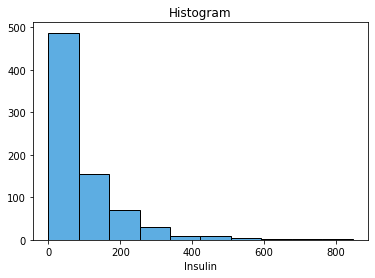

In [41]:
fig, ax = plt.subplots()
ax.hist(df["insulin"], color = '#5DADE2', edgecolor='black')
ax.set(xlabel="Insulin", title="Histogram")

plt.show()

## Look for inappropriate values

In [42]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000


## Convert the inappropriate (zero) values to null/missing values

In [43]:
# Select the columns where zeros don't make sense (are missing values) and locate the zeros as a mask

mask = df[['glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi']] == 0
mask.head()

,glucose_conc,diastolic_bp,thickness,insulin,bmi
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,True,True,False
3,False,False,False,False,False
4,False,False,False,False,False


In [44]:
#### NOTE:  NaN values will give you errors in scikit-learn, so be sure to impute/convert the nan values prior to using scikit-learn.

# replace the zeros with np.nan (Not a Number/Null)

df[mask] = np.nan
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,50,True
1,1,85.0,66.0,29.0,NaN,26.6,31,False
2,8,183.0,64.0,NaN,NaN,23.3,32,True
3,1,89.0,66.0,23.0,94.0,28.1,21,False
4,0,137.0,40.0,35.0,168.0,43.1,33,True


## How many missing values are there for insulin?

In [45]:
df["insulin"].isnull().sum()

374

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
num_preg        768 non-null int64
glucose_conc    763 non-null float64
diastolic_bp    733 non-null float64
thickness       541 non-null float64
insulin         394 non-null float64
bmi             757 non-null float64
age             768 non-null int64
diabetes        768 non-null bool
dtypes: bool(1), float64(5), int64(2)
memory usage: 42.9 KB


## View the new distribution

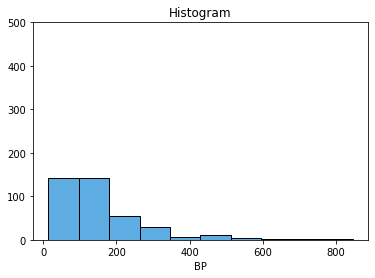

In [47]:
fig, ax = plt.subplots()
ax.hist(df['insulin'], color = '#5DADE2', edgecolor='black')
ax.set(xlabel="BP", title="Histogram")
ax.set_ylim((0, 500))

plt.show()

## After replacing the inappropriate (zero) values with null values, what is the corrected mean for insulin?

In [48]:
# Note the corrected mean of "insulin" now that the zeros are replaced with np.nan

df["insulin"].mean()

155.5482233502538

In [49]:
# Note the median value

df["insulin"].median()

125.0

## Impute the missing Insulin values with the corrected mean.

In [50]:
corrected_insulin_mean = df["insulin"].mean()

df['insulin'] = df['insulin'].fillna(corrected_insulin_mean)

## Confirm the replacement of the missing values for insulin

In [51]:
df["insulin"].isnull().sum()

0

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
num_preg        768 non-null int64
glucose_conc    763 non-null float64
diastolic_bp    733 non-null float64
thickness       541 non-null float64
insulin         768 non-null float64
bmi             757 non-null float64
age             768 non-null int64
diabetes        768 non-null bool
dtypes: bool(1), float64(5), int64(2)
memory usage: 42.9 KB
